# **Libraries**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Analysis**

In [25]:
data = pd.read_csv("unemployment.csv")

In [26]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [27]:
data.shape

(267, 9)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [29]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [30]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [35]:
data.columns = data.columns.str.strip()

In [36]:
data.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


<Figure size 1200x800 with 0 Axes>

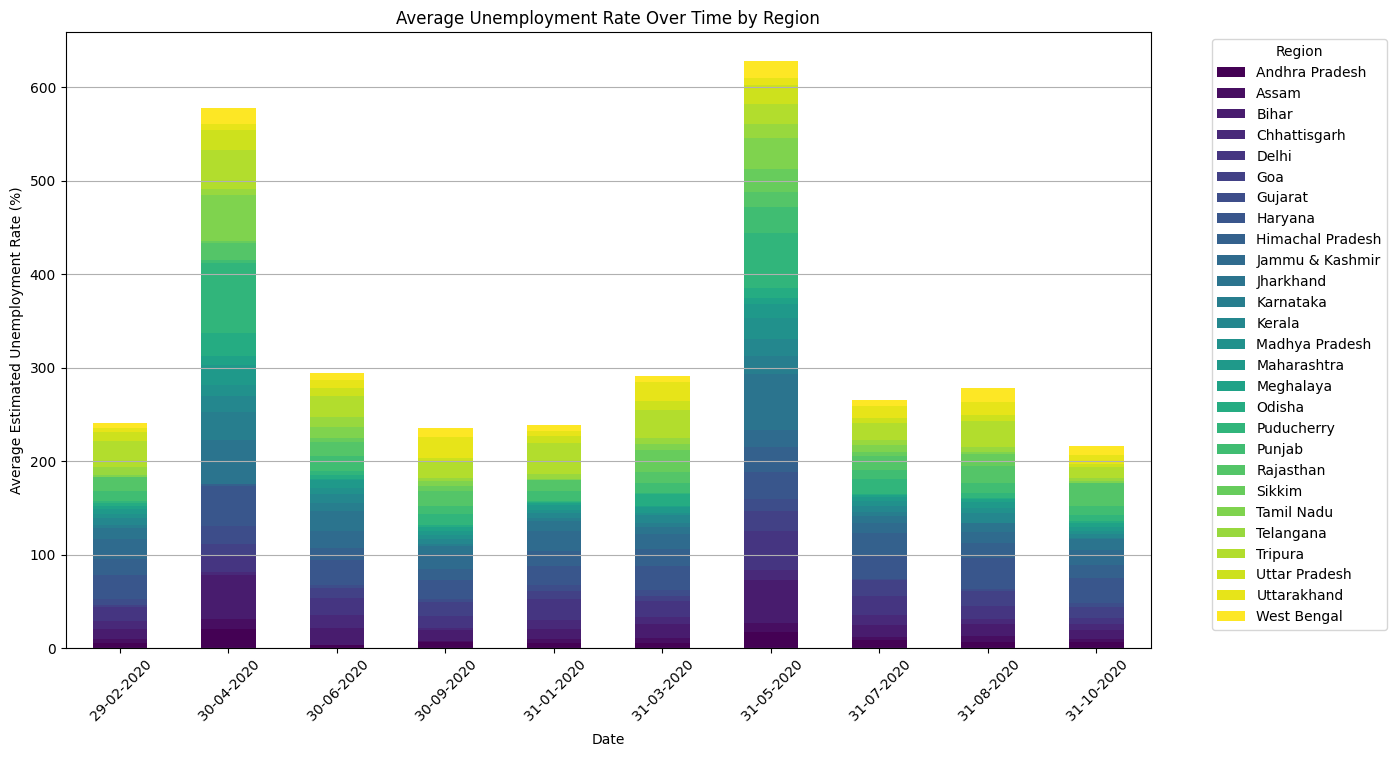

In [38]:
plt.figure(figsize=(12, 8))

avg_unemployment = data.groupby(['Region', 'Date'])['Estimated Unemployment Rate (%)'].mean().reset_index()
pivot_data = avg_unemployment.pivot(index='Date', columns='Region', values='Estimated Unemployment Rate (%)')
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

plt.title('Average Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Average Estimated Unemployment Rate (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

This bar plot represents the average estimated unemployment rate over time across various regions in India.

**Key Observations:**
1. **Peak Unemployment Periods**: The unemployment rate peaked notably in April 2020 and again in May 2020, which likely corresponds to the economic impact of the COVID-19 pandemic during the national lockdown in India. The sharp increase in unemployment during these months is clearly visible.

2. **Regional Variation**: The variation in the height of the bars for different dates indicates fluctuations in the average unemployment rate. Some regions, represented by specific colors, consistently contribute more to the overall unemployment rate.

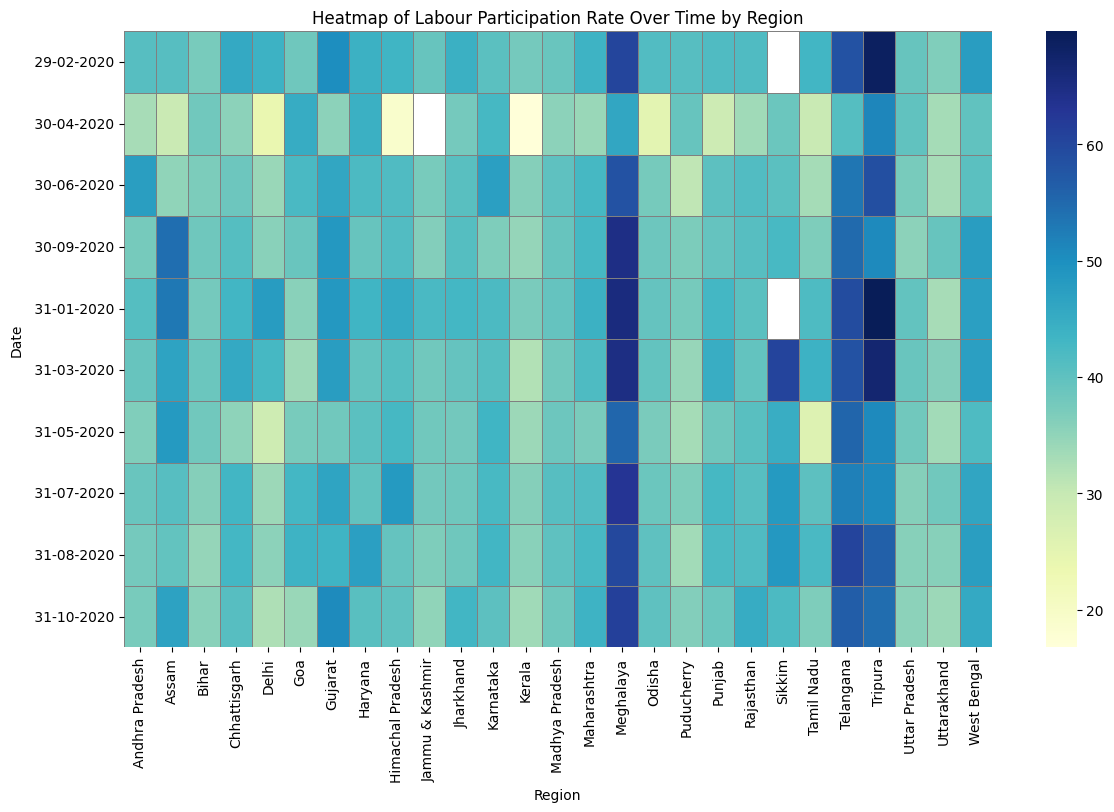

In [41]:
pivot_data = data.pivot(index='Date', columns='Region', values='Estimated Labour Participation Rate (%)')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', linewidths=0.5, linecolor='gray', annot=False)
plt.title('Heatmap of Labour Participation Rate Over Time by Region')
plt.xlabel('Region')
plt.ylabel('Date')
plt.show()

The heatmap visualizes the labor participation rate over time across different regions. Based on the color gradient, the key observations include:

1. **Regional Variations**: There are noticeable differences in labor participation rates among regions. Some regions consistently have higher participation rates (indicated by darker blue shades), while others have lower rates (lighter colors).

2. **Temporal Trends**: Over time, certain regions show fluctuations in labor participation, possibly influenced by external factors such as economic conditions or policy changes. For example, there are visible dips (lighter colors) in certain regions around specific dates, which might correlate with significant events like the COVID-19 pandemic.

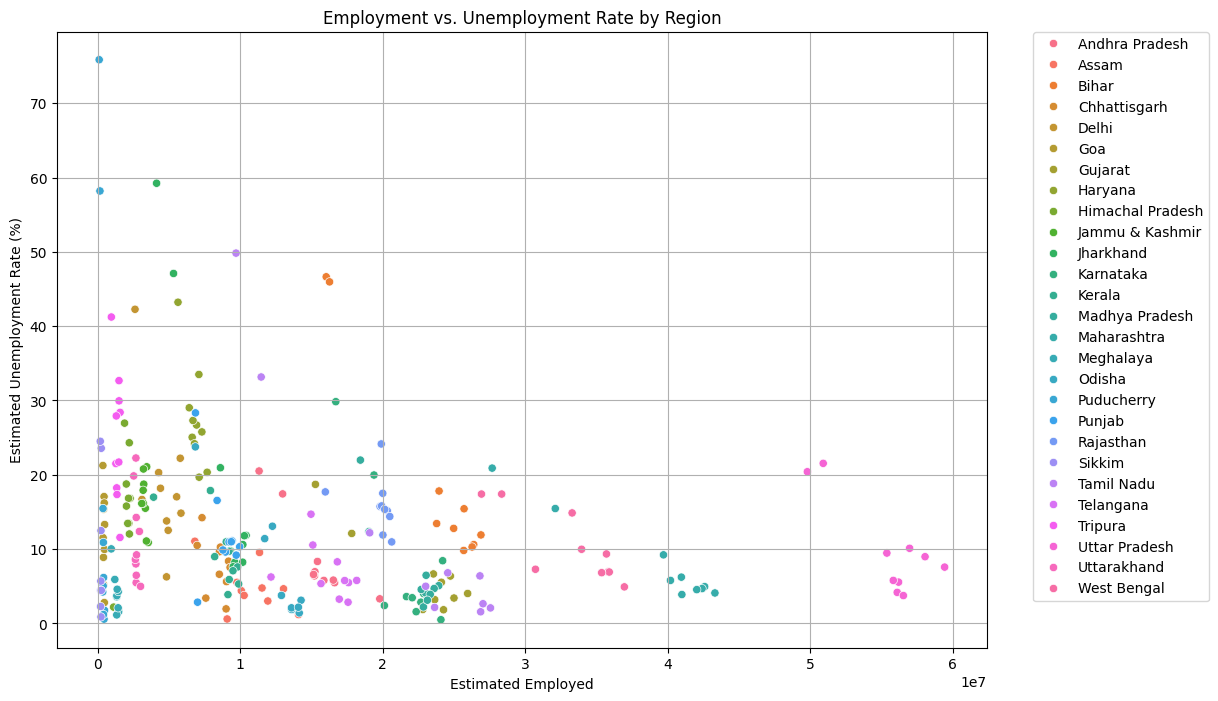

In [43]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Estimated Employed', y='Estimated Unemployment Rate (%)', hue='Region', data=data)
plt.title('Employment vs. Unemployment Rate by Region')
plt.xlabel('Estimated Employed')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()